# 7-2 分類資料的準備

# 機器學習概要

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

照例是讀入我們的標準套件。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 用 SVM 來做分類

#### 先做個簡單的資料

假設我們有四個點, 有兩個類別。

In [2]:
x = np.array([[-3,2], [-6,5], [3,-4], [2,-8]]) # x->f(x) series 資料結構
y = np.array([1, 1, 2, 2])

我們要畫圖時, 需要把 $x$ 中點的 $x$-座標, $y$-座標分成兩個 list (array)。記得我們要 $x$ 全部是這樣叫出來的。

而 $x$ 中前面的元素 ($x$-座標) 是這樣。當然 $y$-座標也是類似方法叫出來。

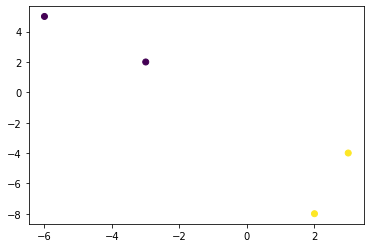

In [3]:
plt.scatter([-3, -6, 3, 2], [2, 5, -4, -8], c=[1,1,2,2]) # c:分類

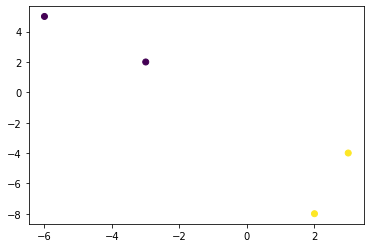

In [4]:
plt.scatter([-3, -6, 3, 2], [2, 5, -4, -8], c=y)

In [5]:
x

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [6]:
x[2, 1]

-4

In [7]:
x[:,0]    # x座標

array([-3, -6,  3,  2])

In [8]:
x[:,1]    # y座標

array([ 2,  5, -4, -8])

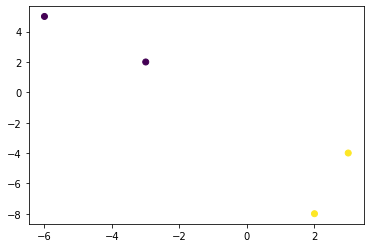

In [9]:
plt.scatter(x[:,0], x[:,1], c=y)

於是我們就能畫圖, `s=50` 是設定點的大小, `c=y` 就是指定顏色, 不同類別不同色。

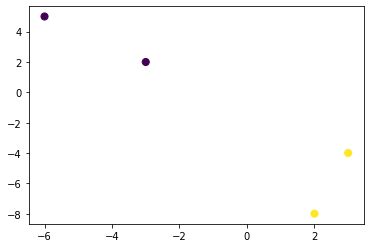

In [10]:
plt.scatter(x[:,0], x[:,1], s=50, c=y)

# 7-3 SVM 做分類

In [11]:
x

array([[-3,  2],
       [-6,  5],
       [ 3, -4],
       [ 2, -8]])

In [12]:
y

array([1, 1, 2, 2])

### SVM 支持向量機

支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

打開一台機器 (這以後我們常常會做類似的動作)。

In [13]:
from sklearn.svm import SVC

In [14]:
# 支持向量機開台的方法：機器的變數名稱 = SVC()
clf = SVC()

學習! 這樣就做完了!!

In [15]:
# 支持向量機訓練的方法：機器的變數名稱.fit(輸入資料,正確答案)
clf.fit(x, y)

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 預測結果

先來看看我們之前用來學的有沒有做對。

In [16]:
# 支持向量機預測的方法：機器的變數名稱.predict(要預測的array)
clf.predict([[-3,2]])

array([1])

In [17]:
clf.predict(x)

array([1, 1, 2, 2])

In [18]:
clf.predict([[2.5,3]])

array([1])

# 7-4 完整畫出我們的分類結果

再來視覺化一下我們的成果。

#### meshgrid(做格點)

In [19]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [20]:
# 用 meshgrid找格點：X,Y = np.mashgrid(X格點,Y格點)
X, Y = np.meshgrid(xx,yy)

In [21]:
X

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [22]:
Y

array([[5, 5, 5, 5],
       [6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8]])

![meshgrid](svm_meshgrid.jpg)

In [23]:
X, Y = np.meshgrid(np.linspace(-6,3,30), np.linspace(-8,5,30))

#### ravel 拉平法

In [24]:
# 產生將 array拉平的超簡單方法：array變數.ravel()
X = X.ravel()
Y = Y.ravel()

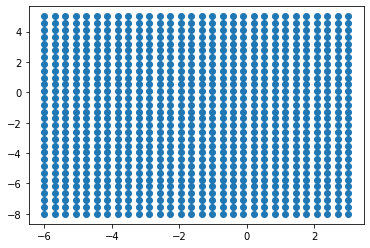

In [25]:
plt.scatter(X, Y)

#### zip 高級組合法

In [26]:
xx = [1,2,3,4]
yy = [5,6,7,8]

In [27]:
list(zip(xx,yy))

[(1, 5), (2, 6), (3, 7), (4, 8)]

In [28]:
Z = clf.predict(list(zip(X,Y)))

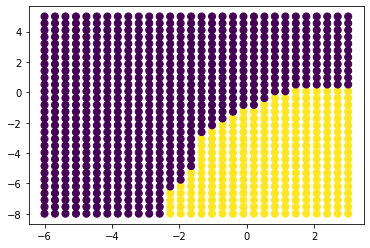

In [29]:
plt.scatter(X, Y, s=50, c=Z)